## Problem 1

In [1]:
import torch
import torch.optim as optim

### (a) Tensor

Construct an uninitialized 4x4 matrix:





In [2]:
# todo
x = torch.rand(4,4)
print(x)

tensor([[0.8644, 0.3341, 0.5548, 0.7913],
        [0.0072, 0.7330, 0.5189, 0.3253],
        [0.5254, 0.1827, 0.2064, 0.3782],
        [0.7501, 0.2718, 0.6586, 0.9600]])


Construct a randomly initialized 3x3 matrix from a uniform distribution on the interval [0, 10)

In [3]:
# todo
x = 10 * torch.rand(3,3)
print(x)

tensor([[0.5424, 8.0749, 9.4233],
        [3.8161, 7.8092, 7.4126],
        [8.2330, 8.0457, 6.9307]])


Construct a 2x2 matrix filled zeros with data type float32:

In [4]:
# todo
x = torch.zeros((2, 2), dtype=torch.float32)
print(x)

tensor([[0., 0.],
        [0., 0.]])


Construct a 2x2 matrix from the normal distribution with zero mean and one std with the same shape as x. 

y's data type should be float32. 

Print the size of x and y.

In [5]:
x = torch.ones(5, 5, dtype=torch.float64)
# todo
y = torch.normal(mean=torch.zeros_like(x), std=torch.ones_like(x))
print(y)
# todo: print the size of x and y
print(x.shape)
print(y.shape)

tensor([[-0.3748,  0.8782,  0.0112,  1.1683, -0.1832],
        [-0.5513,  1.8452, -1.1714,  0.0531, -0.5326],
        [ 1.7150, -1.6217,  2.0304,  0.1354, -0.6250],
        [-1.1176, -0.2422,  2.1268,  1.2689, -0.4771],
        [ 0.1511,  0.6877,  1.5623, -0.9757,  1.3186]], dtype=torch.float64)
torch.Size([5, 5])
torch.Size([5, 5])


### (b) Operations

Addition: Print x + y

In [6]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)
print(x)
print(y)
# todo
print(x+y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[4., 5.],
        [6., 7.]])
tensor([[ 5.,  7.],
        [ 9., 11.]])


Addition: add y and x inplace (modify y)

In [7]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)

# todo: adds x to y

print(y)

y = x+y
print(y)

tensor([[4., 5.],
        [6., 7.]])
tensor([[ 5.,  7.],
        [ 9., 11.]])


Indexing

In this part, you will use indexing techniques to access part of data store in tensor **x**.
x is a 3x3x3 matrix.

For simplicity, we let (a, b, c) represents the a-th in the first axis, b-th in the second axis and c-th in the third axis, a, b and c start from 0, 

e.g get x at (0, 1, 1) is to get the first in the first axis, second in the second axis and second in the third axis of x, which returns 5. 

We also let getting x at (0:2, 1, 1) mean get the first two rows in the first axis, second in the second axis and second in the third axis.

Hint: You should use standard NumPy-like indexing.


In [8]:
x = torch.arange(1, 28, dtype=torch.int32).reshape(3, 3, 3)
print(x)
# Example: get (0, 1, 1) of x
print(x[0, 1, 1])
# Example: get (0:2, 1, 1) of x
print(x[0:2, 1, 1])

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]], dtype=torch.int32)
tensor(5, dtype=torch.int32)
tensor([ 5, 14], dtype=torch.int32)


In [9]:
# todo: get (1, 2, 1) of x
print(x[1, 2, 1])
# todo: get (0, 1:3, 1) of x
print(x[0, 1:3, 1])
# todo: get (1:3, 0:3, 1:3) of x
print(x[1:3, 0:3, 1:3])

tensor(17, dtype=torch.int32)
tensor([5, 8], dtype=torch.int32)
tensor([[[11, 12],
         [14, 15],
         [17, 18]],

        [[20, 21],
         [23, 24],
         [26, 27]]], dtype=torch.int32)


Resizing

In [10]:
A = torch.arange(12)

# todo: resize A to 3x4 using view
print(A.view(3,4))
# todo: resize A to 4x3 using reshape
print(A.resize(4,3))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


/usr/local/lib/python3.9/dist-packages/torch/_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Question: what is the difference between view and reshape of a tensor?

## Problem 2

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from the [google drive link](https://drive.google.com/file/d/13BJmpfohMGthH9gGRYgxMyBk3Y2J8vE8/view?usp=sharing) and put into your Google Drive.
Mount your Google Drive to this notebook.

In [11]:
# Show matplotlib graphs in your notebook
%matplotlib inline

In [12]:
# Mount your Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load MNIST dataset from your Google Drive. 

Different from HW1, we downsample the data from 28x28 to 14x14.
The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

In [13]:
from scipy.io import loadmat
import torch
import torchvision.transforms as T


mnist = loadmat('/content/gdrive/My Drive/mnist.mat') # change the file path according to the path where you put mnist.mat on your Google Drive.

# convert data to torch, normalize and reshape
data = torch.reshape(torch.from_numpy(mnist['traindata']).to(torch.float)/255.0 - 0.5, (mnist['traindata'].shape[0], 1, 28, 28))
testdata = torch.reshape(torch.from_numpy(mnist['testdata']).to(torch.float)/255.0 - 0.5, (mnist['testdata'].shape[0], 1, 28, 28))

trainlabels = torch.from_numpy(mnist['trainlabels'].ravel()[:50000])
validlabels = torch.from_numpy(mnist['trainlabels'].ravel()[50000:])

resize = T.Resize((14,14))
data = resize(data)
testdata = resize(testdata)
traindata = data[:50000]
validdata = data[50000:]


print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([50000, 1, 14, 14])
torch.Size([50000])
torch.Size([10000, 1, 14, 14])
torch.Size([10000])
torch.Size([10000, 1, 14, 14])


In [14]:
from torch.utils.data import TensorDataset, DataLoader

mnist_train = TensorDataset(traindata, trainlabels)
mnist_valid = TensorDataset(validdata, validlabels)
mnist_train_loader = DataLoader(mnist_train, batch_size=128)
mnist_valid_loader = DataLoader(mnist_valid, batch_size=128)



Visualize an image with label.

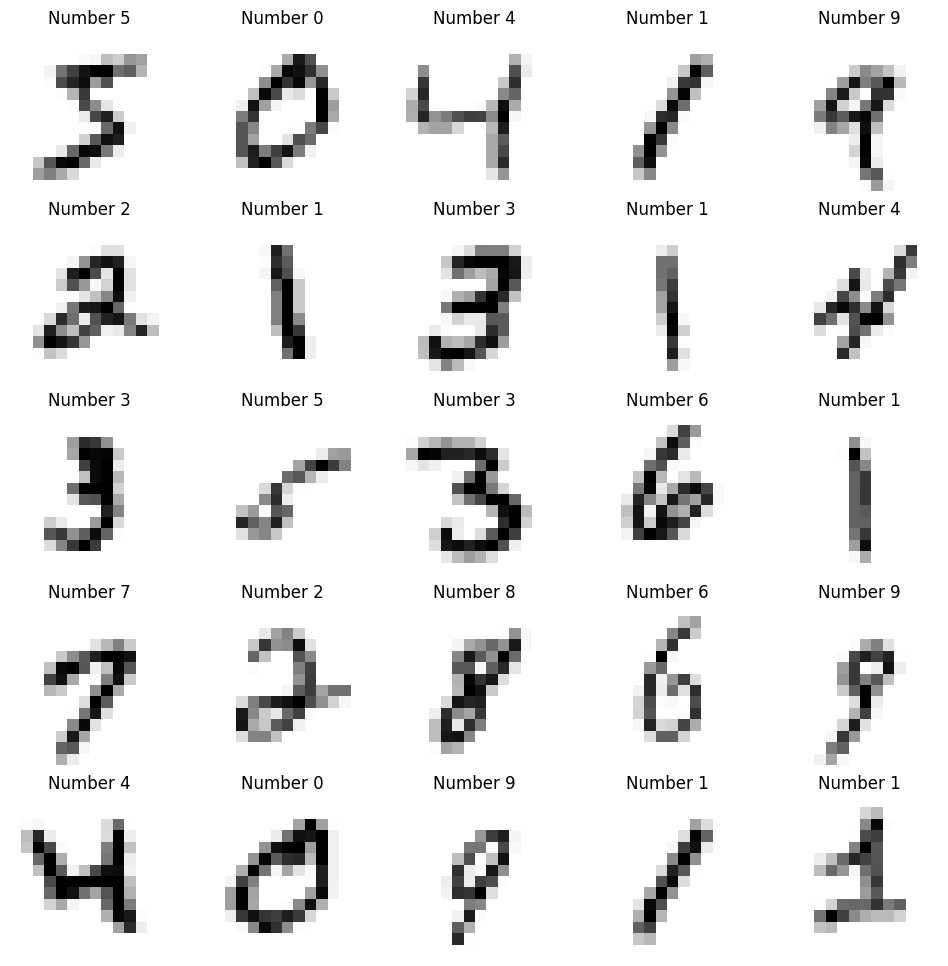

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow((mnist_train[i][0] + 0.5 ).reshape((14, 14)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

(b) Multilayer Perceptron (MLP)

Use MLP to achieve image classification.

Define the following MLP using PyTorch to do image classification on MNIST dataset according to the below figure:
Number of hidden layers: 3
Number of neurons in the layers: [100, 50, 20]
Activation functions: ReLU()
Dropout for all hidden layers: 30%
Output layer + softmax


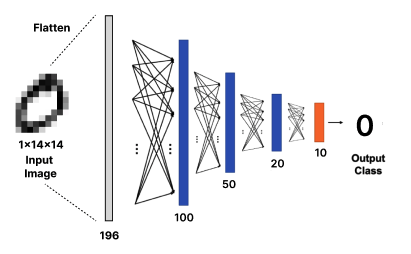

To feed the data into the MLP, each image with dim of $1 \times 14 \times 14$ needs to be flatten into a vector with dim of $196.

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU. Let's first define our device as the first visible cuda device if we have CUDA available.

**Note**: remember to keep the logs of training the different models.

In [16]:
# use GPU to train if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [17]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # TODO: define your MLP
    self.F = nn.Flatten()
    self.fc1 = nn.Linear(196, 100)
    self.fc2 = nn.Linear(100, 50)
    self.fc3 = nn.Linear(50, 20)
    self.fc4 = nn.Linear(20, 10)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.3)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    # TODO: define your forward function
    x = self.F(x) # flatten input tensor
    x = self.dropout(self.relu(self.fc1(x)))
    x = self.dropout(self.relu(self.fc2(x)))
    x = self.dropout(self.relu(self.fc3(x)))
    x = self.softmax(self.fc4(x))
    return x


In [18]:
# TODO: write your training code
from tqdm import tqdm
def train(model, device, train_loader, optimizer, criterion):
  model.train()
  for batch_idx, (data, target) in enumerate(tqdm(train_loader)):
    data, target = data.to(device), target.to(device)
    # print(data.shape)
    # print(target.shape)
    optimizer.zero_grad()
    output = model(data)
    # print(output)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()



# TODO: write your testing code
def test(model, device, test_loader, criterion):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += criterion(output, target).item() * data.size(0)
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader.dataset)
  accuracy = 100. * correct / len(test_loader.dataset)
  print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
      test_loss, correct, len(test_loader.dataset), accuracy))


In [19]:
mlp = MLP().to(device)  # operate on GPU

Define a loss function and optimizer.

In [20]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network. 

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

In [21]:
n_epoch = 10
# todo: use your train() to train the model
for i in range(n_epoch):
  train(mlp, device, mnist_train_loader, optimizer, criterion)

100%|██████████| 391/391 [00:01<00:00, 339.38it/s]


Save the trained model. 
See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

In [22]:
PATH = '/content/gdrive/My Drive/mlp_mnist.pth'
torch.save(mlp.state_dict(), PATH)

Load back in our saved model. (Note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so)



In [23]:
mlp = MLP().to(device)
mlp.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Evaluate the classfication performance on the testing set.

In [24]:
print(mlp)
# todo: use your test() to test your MLP on val set
test(mlp, device, mnist_valid_loader, criterion)

MLP(
  (F): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=196, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (softmax): Softmax(dim=1)
)
Test set: Average loss: 1.5301, Accuracy: 9306/10000 (93%)


(c) Convolution Neural Network (CNN)

Built a LeNet-5 using PyTorch to do image classification. Develop the CNN from the PyTorch NN tutorial introduced in class. 

Note: 
1. The input image dimension shown in the figure below is different from the one we have in this problem.
2. Use kernel size=3 for both convolutions (Original LeNet-5 uses kernel size=5 as shown in the Fig.3 of HW2.pdf)


In [25]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, kernel_size=3, stride=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=3, stride=1)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(16*4, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.dropout = nn.Dropout(p=0.3)
    # TODO: define your CNN

  def forward(self, x):
    # TODO: define your forward function
    x = self.dropout(F.relu(self.conv1(x)))
    x = self.pool1(x)
    x = self.dropout(F.relu(self.conv2(x)))
    x = self.pool2(x)
    x = x.view(-1, 16*4)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

cnn_mnist = CNN().to(device)  # operate on GPU

In [26]:
# todo: similar to MLP, train your CNN model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_mnist.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

for i in range(n_epoch):
  train(cnn_mnist, device, mnist_train_loader, optimizer, criterion)

100%|██████████| 391/391 [00:01<00:00, 301.11it/s]


In [27]:
print(cnn_mnist)
# todo: use your test() to test your CNN on val set
test(cnn_mnist, device, mnist_valid_loader, criterion)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
Test set: Average loss: 0.1161, Accuracy: 9737/10000 (97%)


## Problem 3: Image Classification by CNN

Write code to load and visualize the CIFAR-10 dataset.

CIFAR-10 dataset has the classes (listed below): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size. 

<h4>Note:</h4>
The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

In [ ]:
from torchvision import transforms, datasets

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_trainset = datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform)

cifar_loader = DataLoader(cifar10_trainset, batch_size=len(cifar10_trainset), shuffle=False)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=len(cifar10_testset), shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


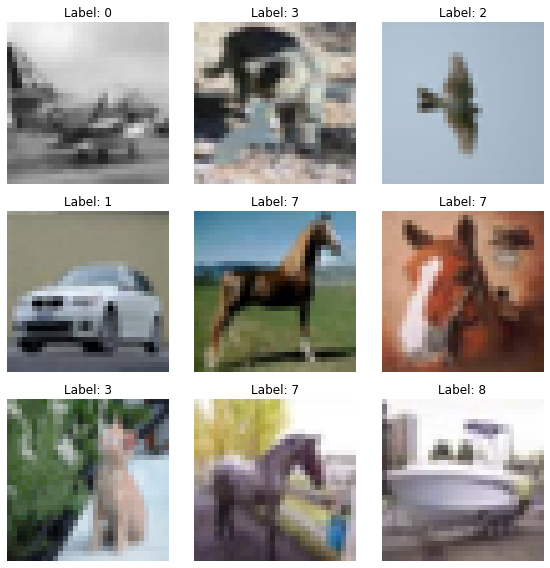

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def cifar_imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

# TODO: visualize some samples in the CIFAR-10 dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(len(cifar10_trainset))
    img, label = cifar10_trainset[idx]
    ax.imshow(cifar_imshow(img))
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

#### Data Augmentation

In [ ]:
from torch.utils.data import ConcatDataset

transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# todo: Implements transforms

# Shifting: randomly shift the images up/down and left/right by within 10%.
transform2 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Rotating: randomly rotate the images by some angles.
transform3 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomRotation(degrees=20),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Flipping: horizontally flip the images.
transform4 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Adding Noise: randomly add some small Gaussian noise to the images.
transform5 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.2),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_list = [transform1, transform2, transform3, transform4, transform5]
augmented_dataset = []
for t in transform_list:
  augmented_dataset.append(datasets.CIFAR10(root='./data/', train=True, download=True, transform=t))

cifar_train_dataset = ConcatDataset(augmented_dataset)
cifar_train_loader = DataLoader(cifar_train_dataset, batch_size=128, shuffle=False)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform1)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Define a CNN to do classification on CIFAR-10 dataset. You can build a CNN from the previous problem and modify it to take 3-channel images (instead of 1-channel images as it was defined).

**Note**: remember to keep the logs of training the different models.

(1) Define a CNN using PyTorch to do image classification. Develop the CNN from the previous PyTorch NN tutorial.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN1(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.conv1 = nn.Conv2d(3, 64, padding=1,kernel_size=3, stride=1)
    self.conv2 = nn.Conv2d(64, 64, padding=1,kernel_size=3, stride=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.bat1 = nn.BatchNorm2d(64)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1)
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.bat2 = nn.BatchNorm2d(128)
    self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1)
    self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1)
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.bat3 = nn.BatchNorm2d(256)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(256, 120)
    self.bat6 = nn.BatchNorm1d(120)
    self.fc2 = nn.Linear(120, 84)
    self.bat7 = nn.BatchNorm1d(84)
    self.fc3 = nn.Linear(84, 10)
    
    

  def forward(self, x):
    # TODO: define your forward function
    # print(x.shape)
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool1(x)
    x = self.bat1(x)
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = self.pool2(x)
    x = self.bat2(x)
    x = F.relu(self.conv5(x))
    x = F.relu(self.conv6(x))
    x = self.pool3(x)
    x = self.bat3(x)
    # print(x.shape)
    x = self.flatten(x)
    # print(x.shape)
    x = F.relu(self.fc1(x))
    x = self.bat6(x)
    x = F.relu(self.fc2(x))
    x = self.bat7(x)
    x = self.fc3(x)
    # print(x.shape)
    return x

cnn1 = CNN1().to(device)  # operate on GPU

Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(cnn1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network.

In [ ]:
# todo: use your train() to train your cnn1
n_epoch = 10
for i in range(n_epoch):
  train(cnn1, device, cifar_train_loader, optimizer, criterion)




100%|███████████████████████████████████████| 1954/1954 [01:15<00:00, 25.95it/s]


Evaluate the classfication performance on the testing set.

In [ ]:
# todo: use your test() to test your cnn1
test(cnn1, device, cifar_test_loader, criterion)

Test set: Average loss: 0.5432, Accuracy: 8711/10000 (87%)


(2) Try different network parameters/configurations (at least 5 combinations). 

You should try to achieve at least **80%** accuracy on the CIFAR-10 testing set using one of your network configuration.


In [ ]:
class CNN2(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.conv1 = nn.Conv2d(3, 64, padding=1,kernel_size=3, stride=1)
    self.conv2 = nn.Conv2d(64, 64, padding=1,kernel_size=3, stride=1)
    # self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.bat1 = nn.BatchNorm2d(64)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1)
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1)
    # self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.bat2 = nn.BatchNorm2d(128)
    self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1)
    self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1)
    # self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.bat3 = nn.BatchNorm2d(256)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(147456, 120)
    self.bat6 = nn.BatchNorm1d(120)
    self.fc2 = nn.Linear(120, 84)
    self.bat7 = nn.BatchNorm1d(84)
    self.fc3 = nn.Linear(84, 10)
    
    

  def forward(self, x):
    # TODO: define your forward function
    # print(x.shape)
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    # x = self.pool1(x)
    x = self.bat1(x)
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    # x = self.pool2(x)
    x = self.bat2(x)
    x = F.relu(self.conv5(x))
    x = F.relu(self.conv6(x))
    # x = self.pool3(x)
    # x = self.bat3(x)
    # print(x.shape)
    x = self.flatten(x)
    # print(x.shape)
    x = F.relu(self.fc1(x))
    x = self.bat6(x)
    x = F.relu(self.fc2(x))
    x = self.bat7(x)
    x = self.fc3(x)
    # print(x.shape)
    return x

cnn2 = CNN2().to(device)  # operate on GPU

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(cnn2.parameters(), lr=0.001)

In [ ]:
for i in range(n_epoch):
  train(cnn2, device, cifar_train_loader, optimizer, criterion)

100%|███████████████████████████████████████| 1954/1954 [01:19<00:00, 24.67it/s]


In [ ]:
test(cnn2, device, cifar_test_loader, criterion)

Test set: Average loss: 0.5420, Accuracy: 8586/10000 (86%)


In [ ]:
class CNN3(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.conv1 = nn.Conv2d(3, 64, padding=1,kernel_size=3, stride=1)
    self.conv2 = nn.Conv2d(64, 64, padding=1,kernel_size=3, stride=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.bat1 = nn.BatchNorm2d(64)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1)
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.bat2 = nn.BatchNorm2d(128)
    self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1)
    self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1)
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.dropout1 = nn.Dropout(0.3)
    self.bat3 = nn.BatchNorm2d(256)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(256, 120)
    self.bat6 = nn.BatchNorm1d(120)
    self.fc2 = nn.Linear(120, 84)
    self.bat7 = nn.BatchNorm1d(84)
    self.fc3 = nn.Linear(84, 10)
    
    

  def forward(self, x):
    # TODO: define your forward function
    # print(x.shape)
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool1(x)
    x = self.dropout1(x)
    x = self.bat1(x)
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = self.pool2(x)
    x = self.dropout1(x)
    x = self.bat2(x)
    x = F.relu(self.conv5(x))
    x = F.relu(self.conv6(x))
    x = self.pool3(x)
    x = self.dropout1(x)
    x = self.bat3(x)
    # print(x.shape)
    x = self.flatten(x)
    # print(x.shape)
    x = F.relu(self.fc1(x))
    x = self.bat6(x)
    x = F.relu(self.fc2(x))
    x = self.bat7(x)
    x = self.fc3(x)
    # print(x.shape)
    return x

cnn3 = CNN3().to(device)  # operate on GPU

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(cnn3.parameters(), lr=0.001)

In [ ]:
for i in range(n_epoch):
  train(cnn3, device, cifar_train_loader, optimizer, criterion)

100%|███████████████████████████████████████| 1954/1954 [01:17<00:00, 25.15it/s]


In [ ]:
test(cnn3, device, cifar_test_loader, criterion)

Test set: Average loss: 0.3832, Accuracy: 8878/10000 (89%)


In [ ]:
import torch.optim as optim
cnn4 = CNN3().to(device)
# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn4.parameters(), lr=0.001)

In [ ]:
for i in range(n_epoch):
  train(cnn4, device, cifar_train_loader, optimizer, criterion)
test(cnn4, device, cifar_test_loader, criterion)

100%|███████████████████████████████████████| 1954/1954 [01:11<00:00, 27.31it/s]


Test set: Average loss: 0.8843, Accuracy: 6883/10000 (69%)


In [ ]:
import torch.optim as optim

cnn5 = CNN3().to(device)
# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn5.parameters(), lr=0.001)

In [ ]:
for i in range(n_epoch):
  train(cnn5, device, cifar_train_loader, optimizer, criterion)
test(cnn5, device, cifar_test_loader, criterion)

100%|███████████████████████████████████████| 1954/1954 [01:12<00:00, 26.77it/s]


Test set: Average loss: 0.3830, Accuracy: 8854/10000 (89%)


| model | loss function | opimizer | epoch | Accuracy |
| --- | --- | --- | --- | --- |
| CNN1 | CrossEntropyLoss | AdamW | 10 | 87% |
| CNN1 w/o maxpoolling | CrossEntropyLoss | AdamW | 10 | 86% |
| CNN1 with dropout layer | CrossEntropyLoss | AdamW | 10 | 89% |
| CNN1 with dropout layer | CrossEntropyLoss | SGD | 10 | 69% |
| CNN1 with dropout layer | CrossEntropyLoss | Adam | 10 | 89% |

Performances using different configurations

todo: past your performance v.s different network configurations in a table.

####  Discussion

(1) Which framework can achieve higher accuracy, MLP or CNN? Briefly explain the reason.

(2) Based on your experiments in Problem3, which parameter can potentially affect your performance most?



(1) CNNs are generally better suited for tasks where the input data has a spatial structure, such as images or video, and can achieve higher accuracy as a result. MLPs are typically used for classification tasks where the input data is represented as a vector of features, but they do not take into account the spatial relationships between the features, which can limit their accuracy on tasks such as image classification.

(2) Based on my experiments, it is evident that the optimizer had a significant impact on my accuracy. For example, when I used the same model with the SGD optimizer, I only obtained a % accuracy, but when I used the Adam optimizer, I obtained an 89% accuracy.